In [1]:
%matplotlib inline

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = 12, 12

## Cargar y limpiar datos

In [2]:
adult_data = pd.read_csv('csv/adult.data.csv')
print('Tamaño, filas x columnas:', adult_data.shape)
adult_data

Tamaño, filas x columnas: (32561, 15)


,edad,TrabajoTipo,fnlwgt,Educacion,educNumReal,EstCivil,Ocupacion,RelacionFamil,Raza,Sexo,Capital,CapPerdida,HrsXSemana,PaisNativo,Ingreso
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
# Existen valores nulos en mis datos?
adult_data.isnull().any()

edad             False
TrabajoTipo      False
fnlwgt           False
Educacion        False
educNumReal      False
EstCivil         False
Ocupacion        False
RelacionFamil    False
Raza             False
Sexo             False
Capital          False
CapPerdida       False
HrsXSemana       False
PaisNativo       False
Ingreso          False
dtype: bool

In [4]:
# Veamos que diferentes tipos de trabajo tenemos
adult_data['TrabajoTipo'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [5]:
adult_data[adult_data['TrabajoTipo'] != ' ?']

,edad,TrabajoTipo,fnlwgt,Educacion,educNumReal,EstCivil,Ocupacion,RelacionFamil,Raza,Sexo,Capital,CapPerdida,HrsXSemana,PaisNativo,Ingreso
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Tenemos algunas filas sin trabajo: ' ?'. Vamos a limpiar esto de nuestros datos
adult_data = adult_data[adult_data['TrabajoTipo'] != ' ?']

# Veamos ahora si el valor ' ?' desaparecio
adult_data['TrabajoTipo'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [7]:
# Deberiamos, por precaucion, checkear si el valor ' ?' esta presente en otras columnas
(adult_data == ' ?').any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


edad             False
TrabajoTipo      False
fnlwgt           False
Educacion        False
educNumReal      False
EstCivil         False
Ocupacion         True
RelacionFamil    False
Raza             False
Sexo             False
Capital          False
CapPerdida       False
HrsXSemana       False
PaisNativo        True
Ingreso          False
dtype: bool

In [8]:
# Vamos a limpiar las filas de las columnas Ocupacion y PaisNativo donde vemos el valor ' ?'
adult_data = adult_data[(adult_data['Ocupacion'] != ' ?') & (adult_data['PaisNativo'] != ' ?')]

# Estamos ok?
print((adult_data == ' ?').any())

# Cuantas filas nos quedaron?
print('\nTamaño, filas x columnas:', adult_data.shape)

edad             False
TrabajoTipo      False
fnlwgt           False
Educacion        False
educNumReal      False
EstCivil         False
Ocupacion        False
RelacionFamil    False
Raza             False
Sexo             False
Capital          False
CapPerdida       False
HrsXSemana       False
PaisNativo       False
Ingreso          False
dtype: bool

Tamaño, filas x columnas: (30162, 15)


## Algo de analisis

In [9]:
# Hagamos una tabla de contingencia comparando salarios por genero
cross_tab = pd.crosstab(adult_data['Sexo'], adult_data['Ingreso'])
cross_tab

Ingreso,<=50K,>50K
Sexo,,
Female,8670,1112
Male,13984,6396


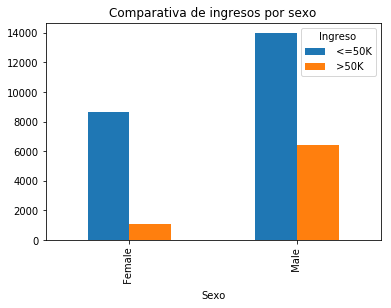

In [10]:
# Ahora el grafico de barras para esta tabla
cross_tab.plot(kind='bar', title='Comparativa de ingresos por sexo')

In [11]:
# Mejor normalizamos los datos
norm_cross_tab = pd.crosstab(adult_data['Sexo'], 
                             adult_data['Ingreso'], 
                             normalize='index')
norm_cross_tab

Ingreso,<=50K,>50K
Sexo,,
Female,0.886322,0.113678
Male,0.686163,0.313837


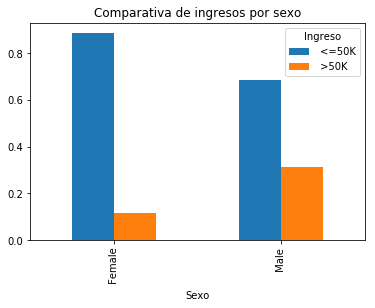

In [12]:
# Veamos como queda el grafico
norm_cross_tab.plot(kind='bar', title='Comparativa de ingresos por sexo')

[Text(0, 0.5, 'Horas por semana'), Text(0.5, 0, 'Edad')]

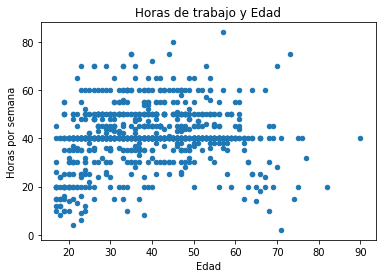

In [13]:
# Ahora veamos relaciones con graficos de dispersion
# adult_data['Sexo'].replace([' Male', ' Female'], [1, 0], inplace=True)
# Usaremos una muestra aleatoria para mejor visualizacion
sample_1k = adult_data.sample(1000)

ax = sample_1k.plot(kind='scatter', x='edad', y='HrsXSemana',
                    title='Horas de trabajo y Edad')
ax.set(xlabel='Edad', ylabel='Horas por semana')

[' Male' ' Female']


[Text(0, 0.5, 'Horas por semana'), Text(0.5, 0, 'Edad')]

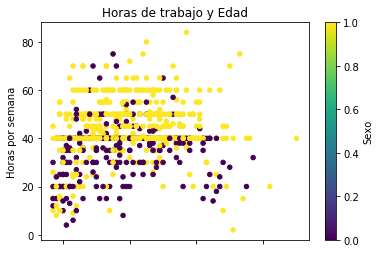

In [14]:
# Y si ademas diferenciamos por genero?
# Pandas nos permite colorear los puntos de diferentes clases, pero para esto
# necesitamos convertir la columna 'Sexo' a un valor numerico
print(sample_1k['Sexo'].unique())  # Tenemos dos valores posibles: Male, Female

# Ahora Male es reemplazado por 1, Female por 0
sample_1k_int = sample_1k.replace([' Female', ' Male'], [0, 1])

ax = sample_1k_int.plot(kind='scatter', x='edad', y='HrsXSemana',
                        c='Sexo', colormap='viridis',
                        title='Horas de trabajo y Edad')

ax.set(xlabel='Edad', ylabel='Horas por semana')


[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Edad')]

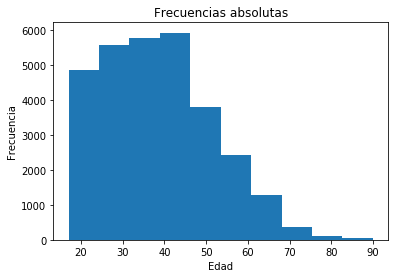

In [15]:
# Analicemos los frecuencias de edades con un histograma
ax = adult_data['edad'].plot(kind='hist', title='Frecuencias absolutas')
ax.set(xlabel='Edad', ylabel='Frecuencia')

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Edad')]

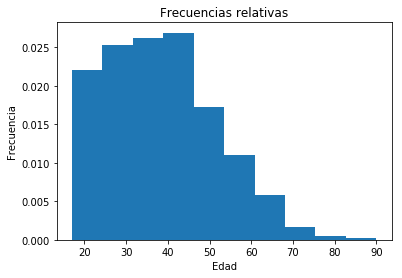

In [16]:
# Lo mismo pero con frecuencias relativas, usar density=1
ax = adult_data['edad'].plot(kind='hist', density=1, title='Frecuencias relativas')
ax.set(xlabel='Edad', ylabel='Frecuencia')

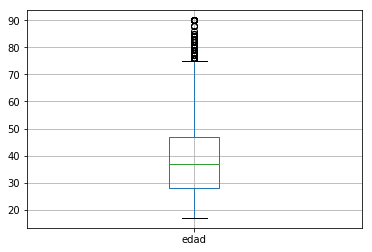

In [17]:
# Analicemos con boxplot la columna Edad, tenemos outliers?
adult_data.boxplot('edad')

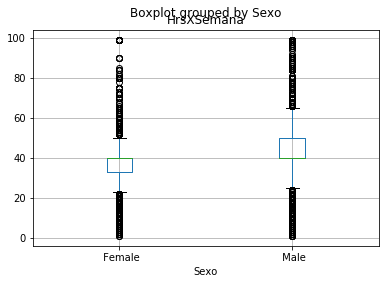

In [18]:
# Que hay acerca de HrsXSemana para cada Sexo
adult_data.boxplot('HrsXSemana', by='Sexo')

## Escalado de datos

In [19]:
adult_data['Capital']

0         2174
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8        14084
9         5178
10           0
11           0
12           0
13           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
28           0
29           0
30           0
31           0
         ...  
32526        0
32527        0
32528        0
32529        0
32532        0
32533        0
32534        0
32535        0
32536        0
32537        0
32538    15020
32540        0
32543        0
32544        0
32545        0
32546        0
32547        0
32548     1086
32549        0
32550        0
32551        0
32552        0
32553        0
32554        0
32555        0
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: Capital, Length: 30162, dtype: int64

In [20]:
# Escalamos los datos con MinMax
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_capital = min_max_scaler.fit_transform(
    adult_data['Capital'].values.reshape(-1, 1).astype(np.float32))
adult_data['CapitalMinMax'] = scaled_capital[:, 0]

# Analicemos los frecuencias de edades escaladas con un histograma
ax = adult_data['CapitalMinMax'].plot(kind='hist')
ax.set(xlabel='CapitalMinMax', ylabel='Frecuencia')

ModuleNotFoundError: No module named 'sklearn'

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Capital')]

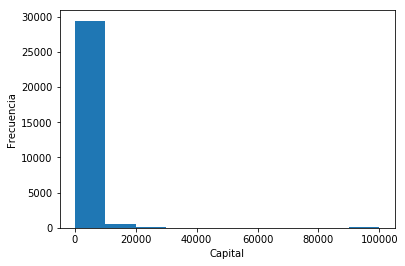

In [21]:
# Se modifico con respecto al histograma sin escalar
ax = adult_data['Capital'].plot(kind='hist')
ax.set(xlabel='Capital', ylabel='Frecuencia')

In [22]:
# Scala con ZScore
from sklearn.preprocessing import scale

scaled_capital = scale(adult_data['Capital'].values.reshape(-1, 1).astype(np.float32),
                       axis=0, with_mean=True, with_std=True)
adult_data['CapitalZScore'] = scaled_capital[:, 0]

# Analicemos los frecuencias de edades escaladas con un histograma
ax = adult_data['CapitalZScore'].plot(kind='hist')
ax.set(xlabel='CapitalZScore', ylabel='Frecuencia')

ModuleNotFoundError: No module named 'sklearn'

# Que pasa con imagenes?

In [23]:
def plot_1d_hist(img):
    hist = cv2.calcHist([img],  # Imagen
                        [0],         # Canales
                        None,        # Mascara o ROI
                        [256],       # Cantidad de bins en eje X
                        [0, 256])    # Intervalo de valores en eje X
    plt.figure()
    plt.title("Histograma en escala de grises")
    plt.xlabel("Intesidad de Pixel")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    
    
def plot_3d_hist(img):
    # Preparamos el plot
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("Histograma con canales de color")
    plt.xlabel("Intesidad de Pixel")
    plt.ylabel("# of Pixels")

    # Iteramos sobre los canales
    channels = cv2.split(img)
    for i in range(3):
        chan = channels[i]
        color = colors[i]
        # Creamos un histograma para el canal actual
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])

        # plot
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    

Alto x Ancho x Canales: (563, 1000)


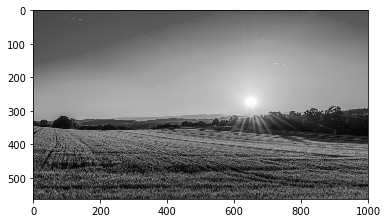

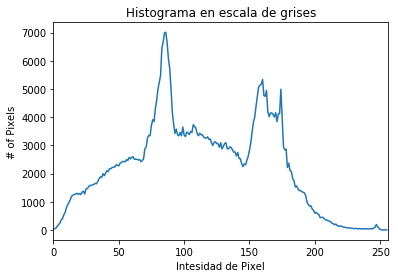

In [30]:
# Cargamos una imagen en escala de grises
img_gray = cv2.imread('images/field.jpg', 0)
print('Alto x Ancho x Canales:', img_gray.shape)
plt.imshow(img_gray, cmap='gray')

# Veamos con un histograma la distribucion de valores en los pixeles
# OpenCV nos provee un metodo para esto
plot_1d_hist(img_gray)


Alto x Ancho x Canales: (563, 1000, 3)


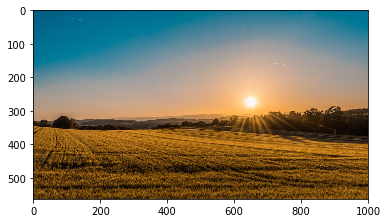

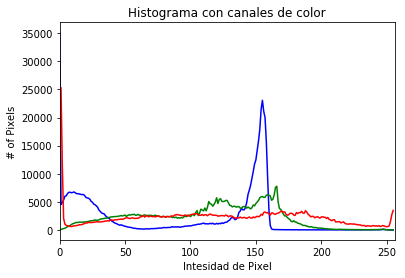

In [31]:
# Veamos ahora con una imagen a color
img_color = cv2.imread('images/field.jpg')
print('Alto x Ancho x Canales:', img_color.shape)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plot_3d_hist(img_color)

Alto x Ancho x Canales: (559, 969, 3)


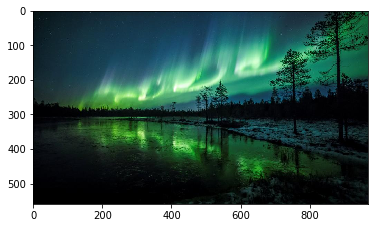

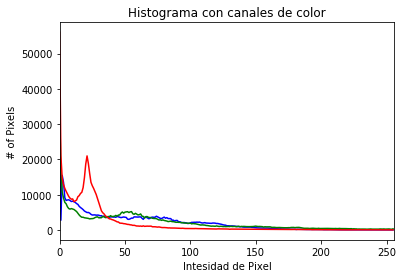

In [26]:
# Probemos con otra imagen
# Veamos ahora con una imagen a color
img_color = cv2.imread('images/aurora.jpg')
print('Alto x Ancho x Canales:', img_color.shape)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plot_3d_hist(img_color)

Alto x Ancho x Canales: (440, 660, 3)


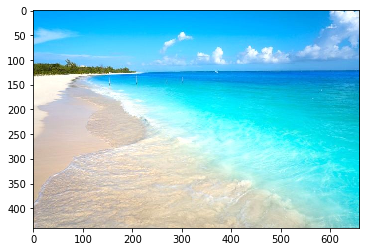

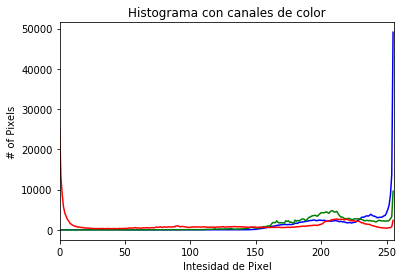

In [27]:
# Probemos con otra imagen
# Veamos ahora con una imagen a color
img_color = cv2.imread('images/beach.jpg')
print('Alto x Ancho x Canales:', img_color.shape)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

plot_3d_hist(img_color)

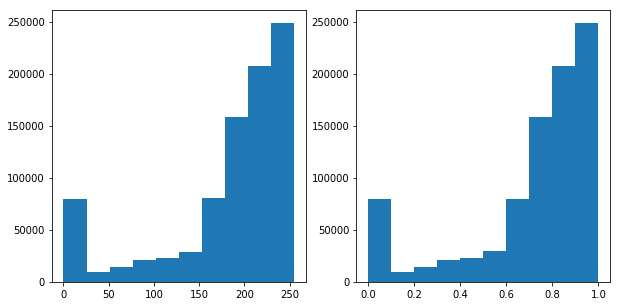

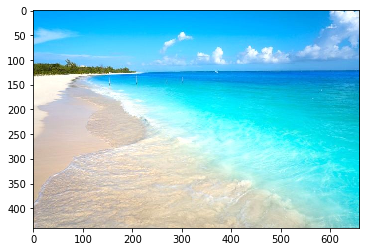

In [28]:
# Como podemos escala los valores de los pixeles
# MinMax en [0, 1]: Simplemente dividir por 255
img_minmax = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) / 255.

f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.hist(np.ravel(img_color))
ax2.hist(np.ravel(img_minmax))
plt.show()

plt.imshow(img_minmax)